In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import LabelEncoder, StandardScaler, label_binarize
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import (
    classification_report, accuracy_score, r2_score, mean_absolute_error,
    mean_squared_error, confusion_matrix, roc_auc_score, roc_curve, auc
)
from sklearn.multiclass import OneVsRestClassifier


A module that was compiled using NumPy 1.x cannot be run in
NumPy 2.0.2 as it may crash. To support both 1.x and 2.x
versions of NumPy, modules must be compiled with NumPy 2.0.
Some module may need to rebuild instead e.g. with 'pybind11>=2.12'.

If you are a user of the module, the easiest solution will be to
downgrade to 'numpy<2' or try to upgrade the affected module.
We expect that some modules will need time to support NumPy 2.

Traceback (most recent call last):  File "<frozen runpy>", line 198, in _run_module_as_main
  File "<frozen runpy>", line 88, in _run_code
  File "C:\Users\WG\AppData\Roaming\Python\Python312\site-packages\ipykernel_launcher.py", line 18, in <module>
    app.launch_new_instance()
  File "C:\Users\WG\AppData\Roaming\Python\Python312\site-packages\traitlets\config\application.py", line 1075, in launch_instance
    app.start()
  File "C:\Users\WG\AppData\Roaming\Python\Python312\site-packages\ipykernel\kernelapp.py", line 739, in start
    self.io_loop.start(

AttributeError: _ARRAY_API not found


A module that was compiled using NumPy 1.x cannot be run in
NumPy 2.0.2 as it may crash. To support both 1.x and 2.x
versions of NumPy, modules must be compiled with NumPy 2.0.
Some module may need to rebuild instead e.g. with 'pybind11>=2.12'.

If you are a user of the module, the easiest solution will be to
downgrade to 'numpy<2' or try to upgrade the affected module.
We expect that some modules will need time to support NumPy 2.

Traceback (most recent call last):  File "<frozen runpy>", line 198, in _run_module_as_main
  File "<frozen runpy>", line 88, in _run_code
  File "C:\Users\WG\AppData\Roaming\Python\Python312\site-packages\ipykernel_launcher.py", line 18, in <module>
    app.launch_new_instance()
  File "C:\Users\WG\AppData\Roaming\Python\Python312\site-packages\traitlets\config\application.py", line 1075, in launch_instance
    app.start()
  File "C:\Users\WG\AppData\Roaming\Python\Python312\site-packages\ipykernel\kernelapp.py", line 739, in start
    self.io_loop.start(

ImportError: 
A module that was compiled using NumPy 1.x cannot be run in
NumPy 2.0.2 as it may crash. To support both 1.x and 2.x
versions of NumPy, modules must be compiled with NumPy 2.0.
Some module may need to rebuild instead e.g. with 'pybind11>=2.12'.

If you are a user of the module, the easiest solution will be to
downgrade to 'numpy<2' or try to upgrade the affected module.
We expect that some modules will need time to support NumPy 2.



In [2]:
df = pd.read_csv("dataset/Unprocessed_Obesity_Dataset.csv")

# Drop unused column
if 'State' in df.columns:
    df = df.drop(columns=["State"])

df.head()

,Age,Gender,Height,Weight,CALC,FAVC,FCVC,NCP,SCC,SMOKE,CH2O,family_history_with_overweight,FAF,TUE,CAEC,MTRANS,NObeyesdad
0,21.0,Female,1.62,64.0,no,no,2.0,3.0,no,no,2.0,yes,0.0,1.0,Sometimes,Public_Transportation,Normal_Weight
1,21.0,Female,1.52,56.0,Sometimes,no,3.0,3.0,yes,yes,3.0,yes,3.0,0.0,Sometimes,Public_Transportation,Normal_Weight
2,23.0,Male,1.80,77.0,Frequently,no,2.0,3.0,no,no,2.0,yes,2.0,1.0,Sometimes,Public_Transportation,Normal_Weight
3,27.0,Male,1.80,87.0,Frequently,no,3.0,3.0,no,no,2.0,no,2.0,0.0,Sometimes,Walking,Overweight_Level_I
4,22.0,Male,1.78,89.8,Sometimes,no,2.0,1.0,no,no,2.0,no,0.0,0.0,Sometimes,Public_Transportation,Overweight_Level_II


In [3]:
# Encode categorical features
label_encoders = {}
for column in df.select_dtypes(include='object').columns:
    le = LabelEncoder()
    df[column] = le.fit_transform(df[column])
    label_encoders[column] = le

# Save target info
target_encoder = label_encoders['NObeyesdad']
target_names = target_encoder.classes_
n_classes = len(target_names)

# Standardize numeric features
numeric_cols = df.select_dtypes(include='number').columns.tolist()
numeric_cols.remove('NObeyesdad')
scaler = StandardScaler()
df[numeric_cols] = scaler.fit_transform(df[numeric_cols])

In [4]:
X = df.drop(columns=['NObeyesdad'])
y = df['NObeyesdad']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [5]:
model_comparison = []

def evaluate_model(name, model):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    # Metrics
    accuracy = accuracy_score(y_test, y_pred)
    f1_macro = classification_report(y_test, y_pred, output_dict=True)['macro avg']['f1-score']
    r2 = r2_score(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))

    model_comparison.append({
        'Model': name,
        'Accuracy': accuracy,
        'F1 Score (Macro)': f1_macro,
        'R² Score': r2,
        'MAE': mae,
        'RMSE': rmse
    })

    # Report
    print(f"\n{name} Accuracy: {accuracy:.4f}")
    print(f"\n{name} Classification Report:")
    print(classification_report(y_test, y_pred, target_names=target_names))

    # Confusion Matrix
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(10, 7))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
                xticklabels=target_names, yticklabels=target_names)
    plt.title(f"{name} - Confusion Matrix")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.xticks(rotation=45)
    plt.yticks(rotation=45)
    plt.tight_layout()
    plt.show()

    # Feature Importance (Tree models)
    if hasattr(model, 'feature_importances_'):
        importances = model.feature_importances_
        feature_df = pd.DataFrame({'Feature': X.columns, 'Importance': importances})
        feature_df = feature_df.sort_values(by='Importance', ascending=False)

        plt.figure(figsize=(10, 6))
        sns.barplot(data=feature_df.head(10), x='Importance', y='Feature')
        plt.title(f"{name} - Top 10 Feature Importances")
        plt.tight_layout()
        plt.show()


Logistic Regression Accuracy: 0.9095

Logistic Regression Classification Report:
                     precision    recall  f1-score   support

Insufficient_Weight       0.89      0.97      0.93      1058
      Normal_Weight       0.90      0.81      0.85      1163
     Obesity_Type_I       0.93      0.94      0.93      1354
    Obesity_Type_II       0.96      0.97      0.97      1216
   Obesity_Type_III       1.00      1.00      1.00      1326
 Overweight_Level_I       0.83      0.83      0.83      1178
Overweight_Level_II       0.84      0.85      0.84      1126

           accuracy                           0.91      8421
          macro avg       0.91      0.91      0.91      8421
       weighted avg       0.91      0.91      0.91      8421



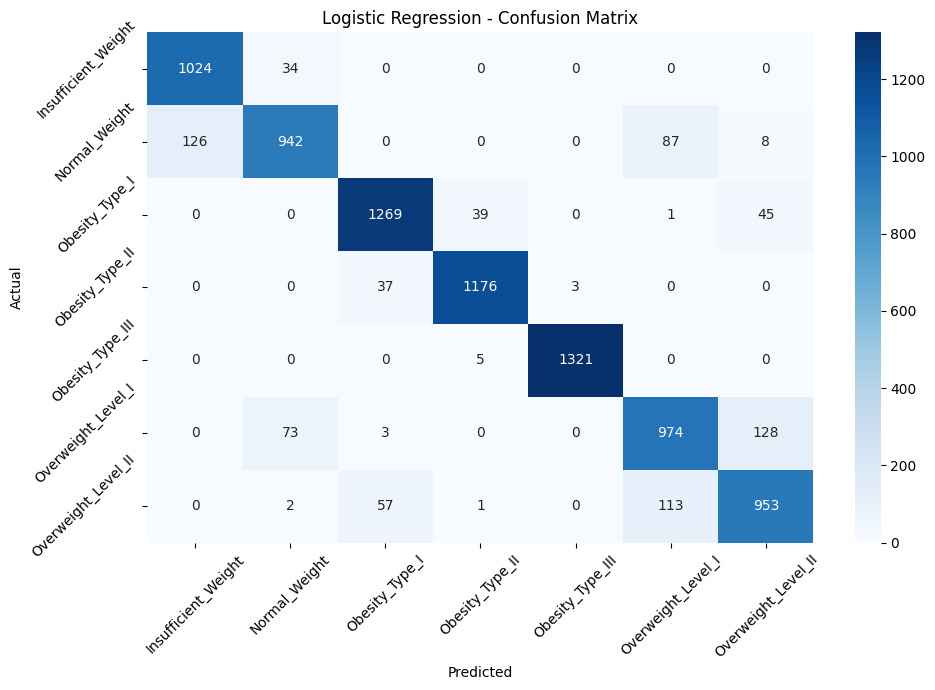

In [6]:
evaluate_model("Logistic Regression", LogisticRegression(max_iter=1000))


Random Forest Accuracy: 0.9831

Random Forest Classification Report:
                     precision    recall  f1-score   support

Insufficient_Weight       0.99      0.99      0.99      1058
      Normal_Weight       0.98      0.98      0.98      1163
     Obesity_Type_I       0.98      0.98      0.98      1354
    Obesity_Type_II       0.99      0.99      0.99      1216
   Obesity_Type_III       1.00      1.00      1.00      1326
 Overweight_Level_I       0.98      0.96      0.97      1178
Overweight_Level_II       0.97      0.97      0.97      1126

           accuracy                           0.98      8421
          macro avg       0.98      0.98      0.98      8421
       weighted avg       0.98      0.98      0.98      8421



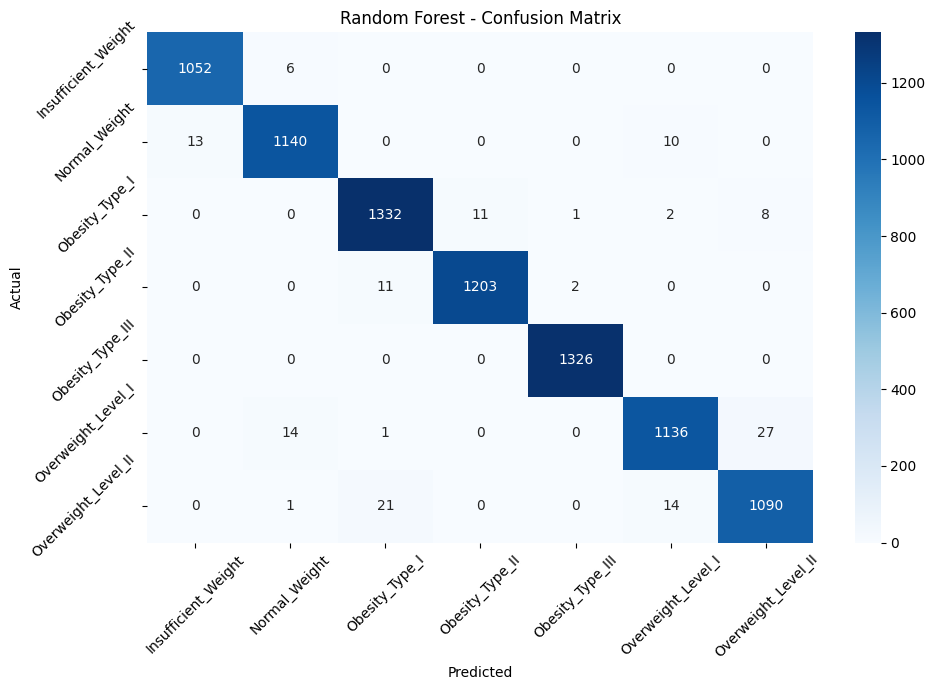

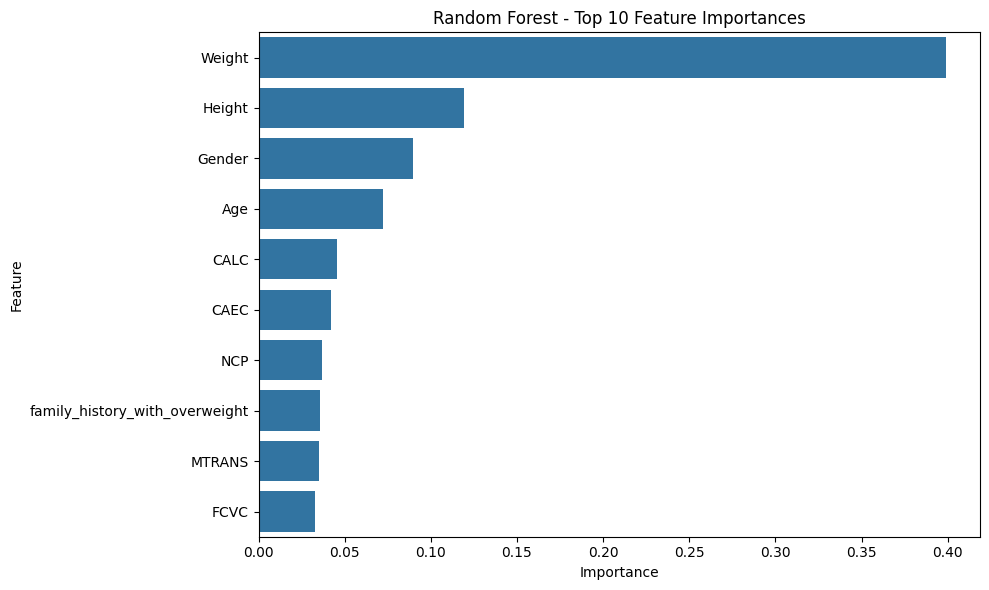

In [7]:
evaluate_model("Random Forest", RandomForestClassifier(random_state=42))

C:\Users\WG\AppData\Roaming\Python\Python312\site-packages\xgboost\training.py:183: UserWarning: [22:40:33] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)



XGBoost Accuracy: 0.9508

XGBoost Classification Report:
                     precision    recall  f1-score   support

Insufficient_Weight       0.96      0.98      0.97      1058
      Normal_Weight       0.92      0.91      0.92      1163
     Obesity_Type_I       0.95      0.97      0.96      1354
    Obesity_Type_II       0.98      0.99      0.98      1216
   Obesity_Type_III       1.00      1.00      1.00      1326
 Overweight_Level_I       0.91      0.89      0.90      1178
Overweight_Level_II       0.92      0.92      0.92      1126

           accuracy                           0.95      8421
          macro avg       0.95      0.95      0.95      8421
       weighted avg       0.95      0.95      0.95      8421



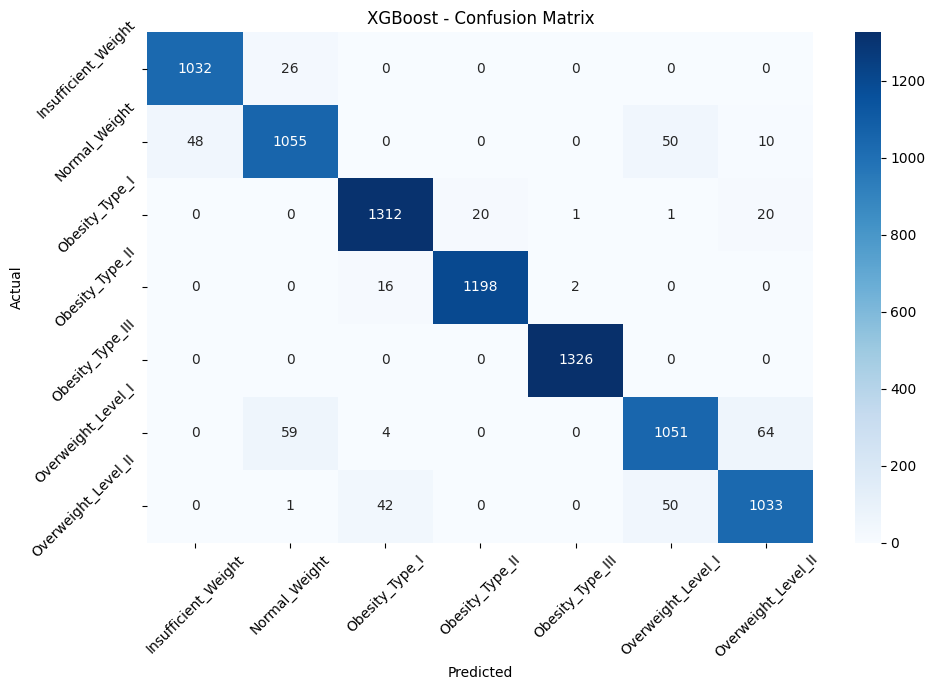

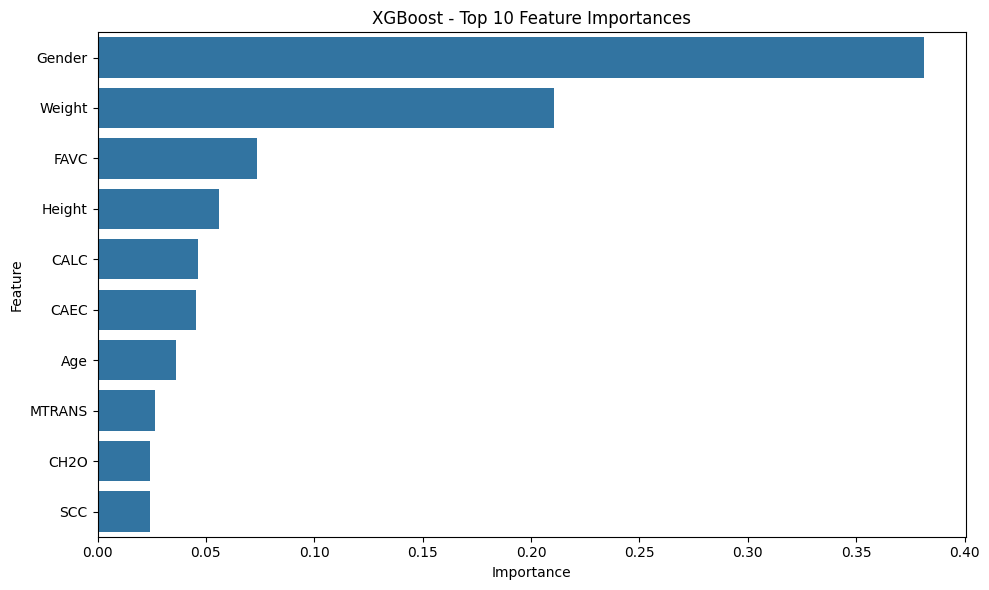

In [8]:
evaluate_model("XGBoost", XGBClassifier(use_label_encoder=False, eval_metric='mlogloss',
                                        n_estimators=100, max_depth=4, learning_rate=0.1))


Model Comparison:


,Model,Accuracy,F1 Score (Macro),R² Score,MAE,RMSE
0,Logistic Regression,0.909512,0.906417,0.843130,0.189764,0.768394
1,Random Forest,0.983137,0.982897,0.968828,0.037050,0.342528
2,XGBoost,0.950837,0.949352,0.896324,0.116613,0.624672


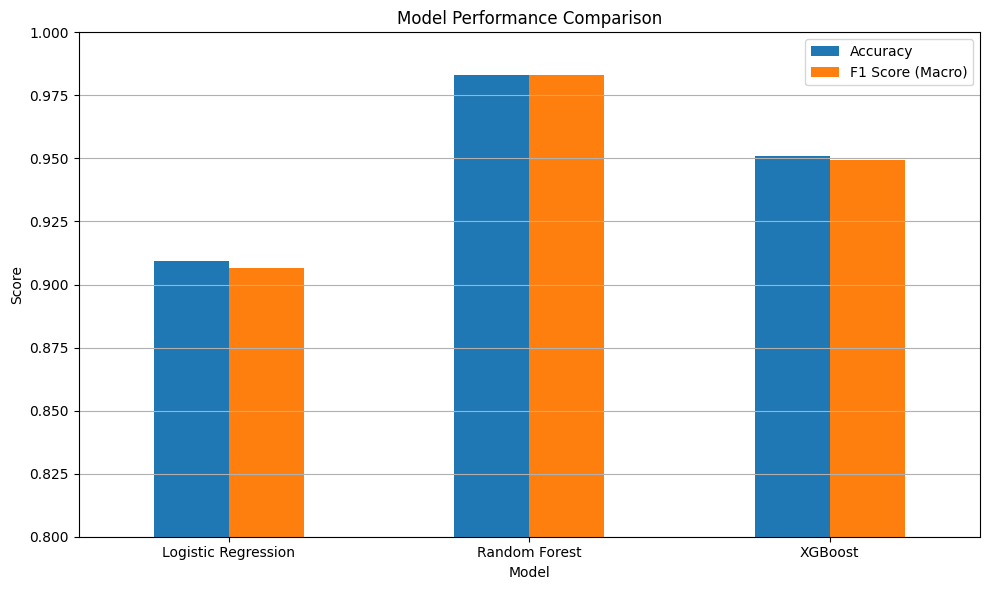

In [9]:
comparison_df = pd.DataFrame(model_comparison)
print("\nModel Comparison:")
display(comparison_df)

comparison_df.set_index("Model")[["Accuracy", "F1 Score (Macro)"]].plot(kind='bar', figsize=(10, 6))
plt.title("Model Performance Comparison")
plt.ylabel("Score")
plt.ylim(0.8, 1.0)
plt.grid(True, axis='y')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

In [10]:
print("\n5-Fold Cross-Validation Accuracy:")
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "Random Forest": RandomForestClassifier(random_state=42),
    "XGBoost": XGBClassifier(use_label_encoder=False, eval_metric='mlogloss')
}

for name, model in models.items():
    scores = cross_val_score(model, X, y, cv=5, scoring='accuracy')
    print(f"{name}: {scores.mean():.4f} ± {scores.std():.4f}")


5-Fold Cross-Validation Accuracy:
Logistic Regression: 0.9077 ± 0.0048
Random Forest: 0.9813 ± 0.0016


C:\Users\WG\AppData\Roaming\Python\Python312\site-packages\xgboost\training.py:183: UserWarning: [22:41:01] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\WG\AppData\Roaming\Python\Python312\site-packages\xgboost\training.py:183: UserWarning: [22:41:02] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\WG\AppData\Roaming\Python\Python312\site-packages\xgboost\training.py:183: UserWarning: [22:41:02] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\WG\AppData\Roaming\Python\Python312\site-packages\xgboost\training.py:183: UserWarning: [22:41:03] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Par

XGBoost: 0.9770 ± 0.0022
